In [1]:
import sys
import os 
SCRIPT_DIR = os.path.dirname(os.path.abspath('topography.ipynb'))
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [2]:
import mne
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import mlab as mlab
from utils.datasets import CustomDataset
from utils.functional import get_data_path, get_trials_len, get_subjects

### EEG TOPOGRAPHY VISUALIZATION

In [41]:
# GET THE DATA
data_path = get_data_path('c:/users/jaulab/desktop/AAD/Data', 'fulsang', filt=False)
# from preprocess import import_data
subject = 'S6'
dataset = CustomDataset('fulsang', data_path, 'train', subject, window=50, hop=1)
trial_len = get_trials_len('fulsang')
chan, samples = dataset.eeg.size()
data = dataset.eeg.view(trial_len, chan, samples // trial_len)

In [42]:
# ADJUST DATA
data = np.transpose(data, (2, 1, 0))
data = np.array(data, dtype=np.float64)

In [43]:
# COMPUTE THE MEAN BETWEEN TRIALS THEN NORMALIZE
mean_trial = np.mean(data, axis=0)  # mean trial
# use standardization or normalization to adjust
mean_trial = (mean_trial - np.mean(mean_trial)) / np.std(mean_trial)
mean_ch = np.mean(mean_trial, axis=1)  # mean samples with channel dimension left

In [44]:
# Draw topography
chan_idx = dataset.chan_idx
biosemi_montage = mne.channels.make_standard_montage('biosemi64')  # set a montage, see mne document
info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=64., ch_types='eeg')  # sample rate

c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\viz\topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in cont.collections:


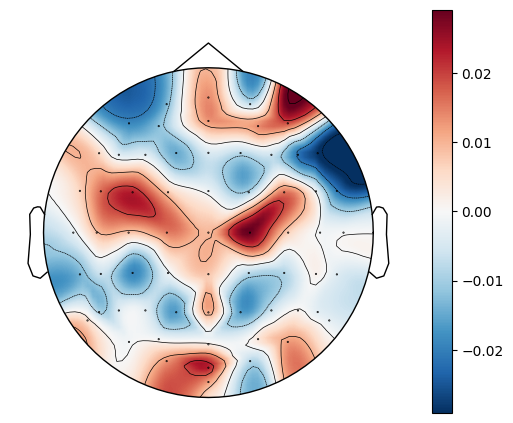

In [45]:
evoked1 = mne.EvokedArray(mean_trial, info)
evoked1.set_montage(biosemi_montage)
plt.figure(1)
# im, cn = mne.viz.plot_topomap(np.mean(mean_trial, axis=1), evoked1.info, show=False)
im, cn = mne.viz.plot_topomap(mean_ch, evoked1.info, show=False)
plt.colorbar(im)
plt.show()

In [58]:
# LOAD THE DATA
dataset = 'fulsang'
subjects = get_subjects(dataset)
data_path = get_data_path('c:/users/jaulab/desktop/AAD/Data', 'fulsang', filt=False)
mean_subj = []
for subj in subjects:
    dataset = CustomDataset('fulsang', data_path, 'train', subj, window=50, hop=1)
    trial_len = get_trials_len('fulsang')
    chan, samples = dataset.eeg.size()
    data = dataset.eeg.view(trial_len, chan, samples // trial_len)
    data = np.transpose(data, (2, 1, 0))
    data = np.array(data, dtype=np.float64)
    # Compute mean and normalize
    mean_trial = np.mean(data, axis=0)
    mean_trial = (mean_trial - np.mean(mean_trial)) / np.std(mean_trial)
    mean_ch = np.mean(mean_trial, axis=1)
    mean_subj.append((mean_trial, mean_ch))

In [62]:
len(mean_subj)

18

c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\viz\topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in cont.collections:
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\utils\check.py:92:

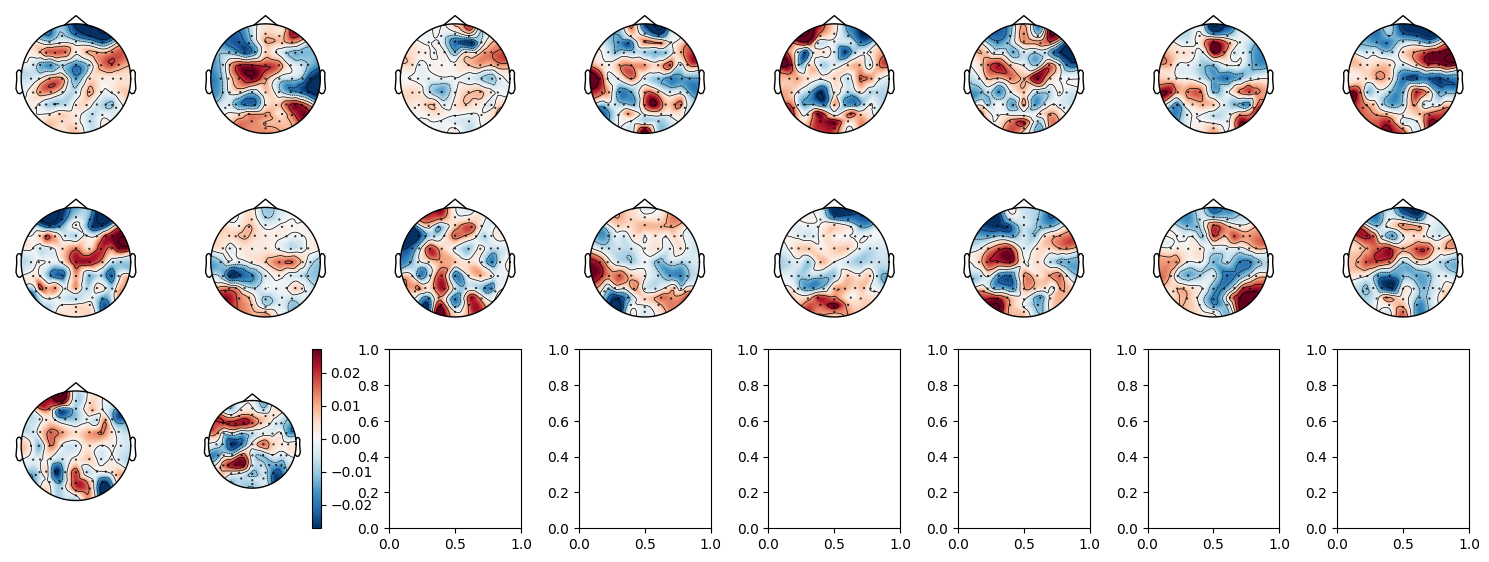

In [72]:
# PLOT ALL THE RESULTS FOR THE SUBJECT

n_plots = len(subjects)

n_rows = (n_plots + 7) // 8

fig, axs = plt.subplots(nrows=n_rows, ncols=8, figsize=(15, 2*n_rows))

axs = axs.flatten()

# Draw topography
biosemi_montage = mne.channels.make_standard_montage('biosemi64')  # set a montage, see mne document
info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=64., ch_types='eeg')  # sample rate

for n, subj in enumerate(subjects):
    
    mean_trial, mean_ch = mean_subj[n]

    evoked1 = mne.EvokedArray(mean_trial, info)
    evoked1.set_montage(biosemi_montage)

    ax = axs[n]
    im, cn = mne.viz.plot_topomap(mean_ch, evoked1.info, axes=ax, show=False)

plt.tight_layout()
plt.colorbar(im)
plt.show()


### EEG DATA VISUALIZATION

In [3]:
# GET THE DATA: the subject and trial to compute
data_path = get_data_path('c:/users/jaulab/desktop/AAD/Data', 'fulsang', filt=False)
data_filt_path = get_data_path('c:/users/jaulab/desktop/AAD/Data', 'fulsang', filt=True)
# from preprocess import import_data
subject = 'S1' 
trial = 54 # from 1 to 50 on fulsang, from 1 to 96 on jaulab
filt = True
dataset = CustomDataset('jaulab', data_path, 'all', subject, window=50, hop=1, filt=filt, filt_path=data_filt_path)
trial_len = get_trials_len('fulsang')
data = dataset.eeg[:, (trial-1)*trial_len:trial*trial_len]

ValueError: no field of name dim

In [80]:
dataset.eeg.shape

torch.Size([61, 162816])

In [81]:
data.shape

torch.Size([61, 0])

In [83]:
dataset.chan_idx

AttributeError: 'CustomDataset' object has no attribute 'chan_idx'

In [75]:
# Create the info to structure data and relate the names with the channels
ch_types = ['eeg'] * data.shape[0]
ch_names = list(dataset.chan_idx)
info = mne.create_info(ch_names=ch_names, sfreq = 64, ch_types=ch_types)

In [76]:
raw = mne.io.RawArray(data, info)
print(raw)
print(raw.info)

Creating RawArray with float64 data, n_channels=64, n_times=3200
    Range : 0 ... 3199 =      0.000 ...    49.984 secs
Ready.
<RawArray | 64 x 3200 (50.0 s), ~1.6 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 32.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 64.0 Hz
>


Effective window size : 4.000 (s)


C:\Users\jaulab\AppData\Local\Temp\ipykernel_19124\91274741.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=30).plot(picks="data", exclude="bads", amplitude=False)
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\mne\viz\utils.py:137: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


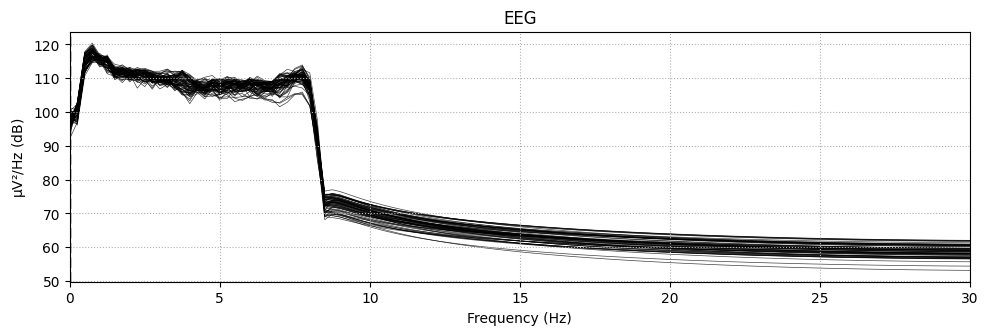

In [77]:
raw.compute_psd(fmax=30).plot(picks="data", exclude="bads", amplitude=False)

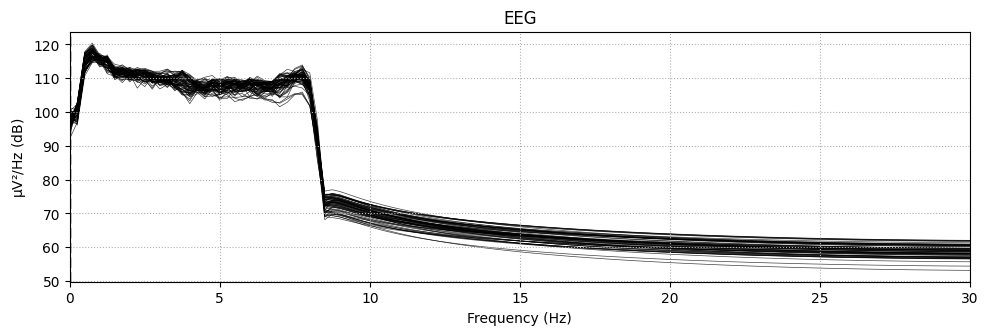

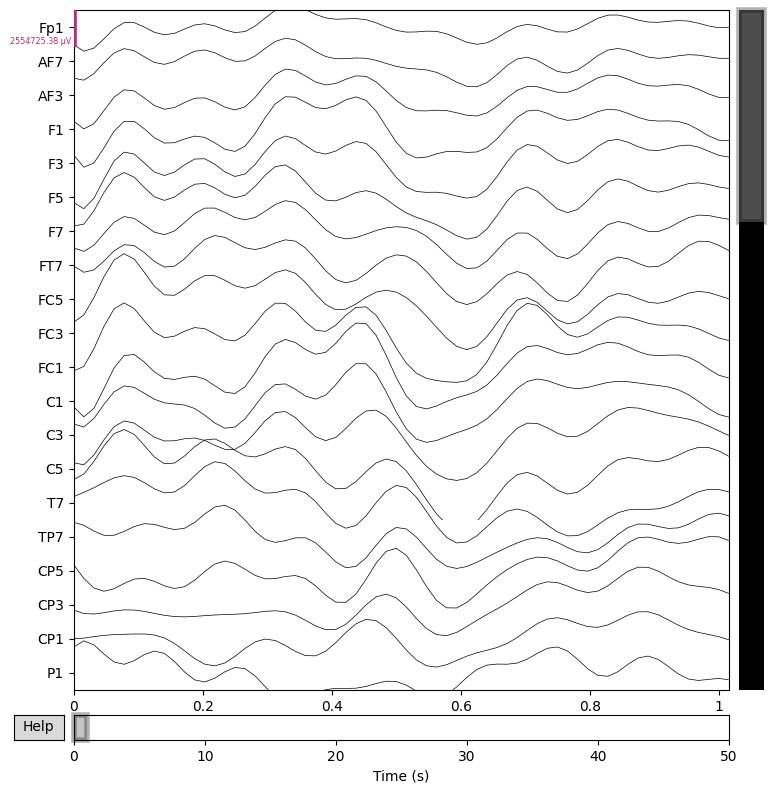

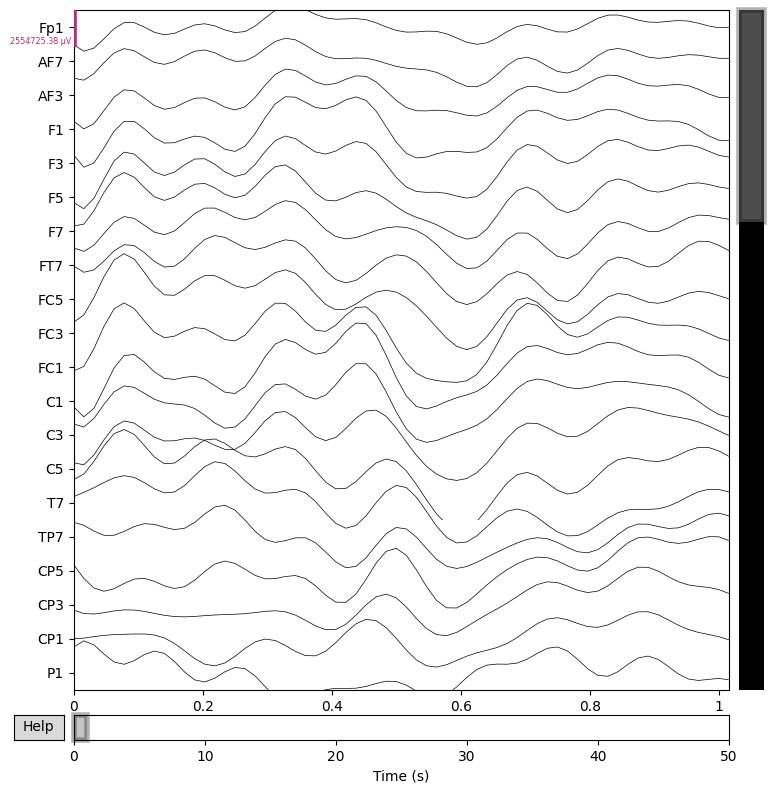

In [78]:
raw.plot(duration=1, n_channels = 20, scalings='auto', show_scrollbars=True, show=True)